# Welcome to Python Probability and Statistics!

In this hands-on notebook, we will explore core ideas of probability and statistics using Python.

You do not need any previous math or coding experience.

Let us get started step by step with

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Probability: The Basics

Probability is a way to talk about how likely something can happen.

Let us start with coin flips and dice rolls.

In [4]:
# Simulate a single coin flip: heads (H) or tails (T)**
result = np.random.choice(["H", "T"])
print("Coin flip result:", result)


Coin flip result: T


In [5]:
# Simulate rolling a six-sided die**
die_roll = np.random.randint(1, 7)
print("Die rolled:", die_roll)


Die rolled: 3


# 2. Descriptive Statistics: Summarizing Data

Descriptive statistics help us understand and talk about patterns in data.

We can calculate averages, medians, and more.


In [6]:
# Example: Basic analysis of a score list  

scores = [75, 80, 90, 80, 95, 70, 70]
mean = np.mean(scores)
median = np.median(scores)
mode = pd.Series(scores).mode().values[0]

print("Scores:", scores)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Scores: [75, 80, 90, 80, 95, 70, 70]
Mean: 80.0
Median: 80.0
Mode: 70


In [7]:
scores_with_missing = [75, 80, 80, 95, 70, np.nan, 90, np.nan, 70, 10, 30]
clean_scores = pd.Series(scores_with_missing).dropna()
mean_clean = clean_scores.mean()

print("Scores with missing:", scores_with_missing)
print("Cleaned mean:", mean_clean)

Scores with missing: [75, 80, 80, 95, 70, nan, 90, nan, 70, 10, 30]
Cleaned mean: 66.66666666666667


# Discrete Distributions: Probability with Counts
- Discrete distributions describe outcomes we can count.

- Let us look at coin flips, dice, and real-life counts.

In [8]:
# Bernoulli trial: 1 coin flip, repeat 10 times
results = np.random.choice([0, 1], size=10)
print("Coin flips (0=Tails, 1=Heads):", results)
print("Number of heads:", np.sum(results))

Coin flips (0=Tails, 1=Heads): [1 0 0 1 1 0 0 0 0 1]
Number of heads: 4


In [9]:
# Binomial: 20 coin flips, count heads
from scipy.stats import binom
heads_count = binom.rvs(n=20, p=0.5, size=1)[0]
print("Number of heads in 20 flips:", heads_count)


Number of heads in 20 flips: 7


In [10]:
# Poisson distribution: rare events per minute
from scipy.stats import poisson
calls = poisson.rvs(mu=2, size=10)
print("Phone calls/minute (10 random minutes):", calls)

Phone calls/minute (10 random minutes): [2 1 5 1 4 2 3 4 1 1]


#  Continuous Distributions: The World of Measurements

Continuous distributions help us model measurements, like height or test scores.

Let us see the normal (bell curve) and exponential distributions in action.

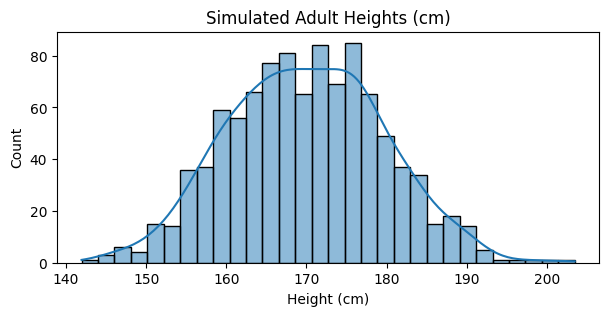

In [11]:
# Normal distribution: 1000 random heights (mean 170, sd 10)
random_heights = np.random.normal(loc=170, scale=10, size=1000)
plt.figure(figsize=(7,3))
sns.histplot(random_heights, bins=30, kde=True)
plt.title("Simulated Adult Heights (cm)")
plt.xlabel("Height (cm)")
plt.show()

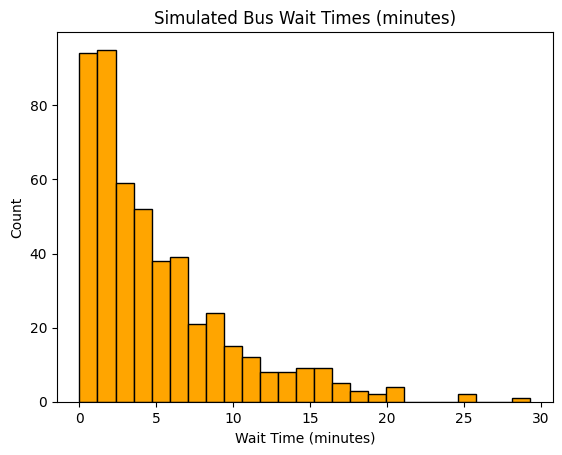

In [12]:
# Exponential distribution: waiting times for a bus, rate 1/5
wait_times = np.random.exponential(scale=5, size=500)
plt.hist(wait_times, bins=25, color="orange", edgecolor="black")
plt.title("Simulated Bus Wait Times (minutes)")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Count")
plt.show()


# Sampling and the Central Limit Theorem
- Sampling is when we take a smaller group from a big population.

- The Central Limit Theorem says averages of samples become normal-shaped, even if the original data are not.

Text(0.5, 0, 'Sample Mean Value')

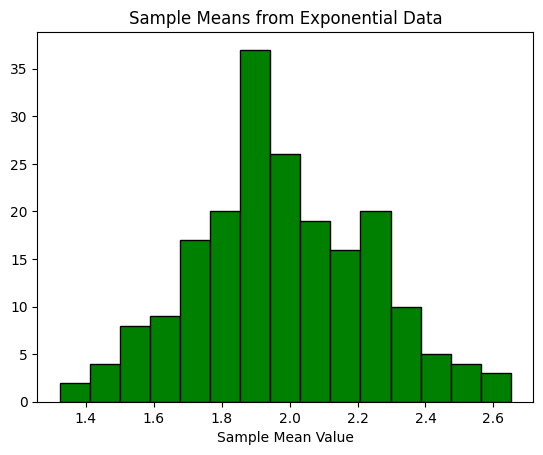

In [13]:
# Simulate many samples and show sample means  
big_sample = np.random.exponential(scale=2, size=10000)  
means = [np.mean(np.random.choice(big_sample, 50)) for _ in range(200)]  
plt.hist(means, bins=15, color="green", edgecolor="black")  
plt.title("Sample Means from Exponential Data")  
plt.xlabel("Sample Mean Value")

# Confidence Intervals
- Confidence intervals tell us how certain we are that a true value falls within a specific range.

- They are used everywhere, from surveys to science.

In [14]:
# 95% confidence interval for mean of 50 tip values  
tips = sns.load_dataset("tips")["total_bill"].sample(50, random_state=42)  
mean_tips = tips.mean()  
std_tips = tips.std()  
from scipy.stats import t  
conf_int = t.interval(0.95, len(tips)-1, loc=mean_tips, scale=std_tips/np.sqrt(len(tips)))  
print("Sample mean:", mean_tips)  
print("95% Confidence interval:", conf_int)

Sample mean: 17.971999999999998
95% Confidence interval: (np.float64(15.34803033416793), np.float64(20.595969665832065))


In [15]:
# Hypothesis test: Do smokers tip more than non-smokers?  
tips_data = sns.load_dataset("tips")  
smoker_tips = tips_data[tips_data["smoker"]=="Yes"]["tip"]  
non_smoker_tips = tips_data[tips_data["smoker"]=="No"]["tip"]  
from scipy.stats import ttest_ind  
t_stat, p_value = ttest_ind(smoker_tips, non_smoker_tips)  
print("Smoker Mean Tip:", smoker_tips.mean())  
print("Non-Smoker Mean Tip:", non_smoker_tips.mean())  
print("p-value:", p_value)

Smoker Mean Tip: 3.008709677419355
Non-Smoker Mean Tip: 2.9918543046357615
p-value: 0.9265931522244976


# Correlation and Covariance: Are Two Things Related?
- Correlation shows if two variables tend to move together.

- Covariance is a similar measure, but not scaled between -1 and 1.

In [16]:
# MPG dataset: find correlation between horsepower and MPG
mpg = sns.load_dataset("mpg").dropna(subset=["horsepower", "mpg"])
corr = mpg["horsepower"].corr(mpg["mpg"])
cov = mpg["horsepower"].cov(mpg["mpg"])
print("Correlation:", corr)
print("Covariance:", cov)

Correlation: -0.7784267838977761
Covariance: -233.8579257790073


Text(0.5, 1.0, 'Horsepower vs. MPG')

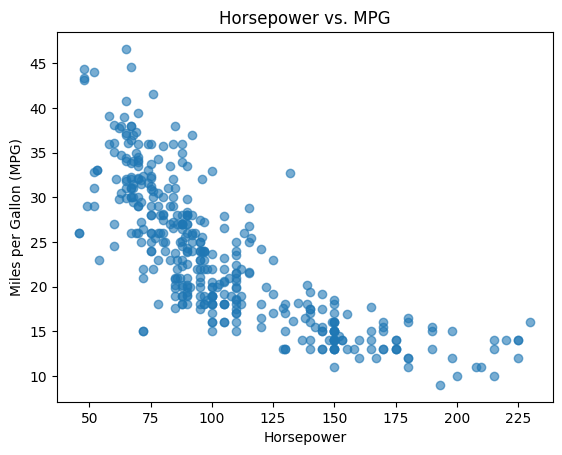

In [17]:
# Plot horsepower vs. MPG
plt.scatter(mpg["horsepower"], mpg["mpg"], alpha=0.6)
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Horsepower vs. MPG")


# Simple Regression: Making Predictions
Regression helps us guess one value based on another.

Let us build a basic prediction model for MPG from horsepower.

In [18]:
from sklearn.linear_model import LinearRegression

X = mpg[["horsepower"]]
y = mpg["mpg"]
model = LinearRegression().fit(X, y)
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
pred_example = model.predict([[100]])[0]
print("Predicted MPG for 100 HP:", pred_example)

Slope: -0.15784473335365365
Intercept: 39.93586102117047
Predicted MPG for 100 HP: 24.151387685805105


# Logistic Regression: Will a Passenger Survive?
Logistic regression handles problems where the answer is yes or no.

Let us use the Titanic dataset to predict survival.

In [19]:
# Data setup
titanic = sns.load_dataset("titanic").dropna(subset=["age", "fare", "sex", "pclass"])
print("Titanic data shape:", titanic.shape)
titanic.head()

Titanic data shape: (714, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# Simple logistic regression: predict survival from age, fare, sex
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare features and target
X = pd.get_dummies(titanic[['age', 'fare', 'sex', 'pclass']], drop_first=True)
y = titanic['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Calculate accuracy
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7674418604651163


# Time Series: Airline Passengers

Time series data tracks values over time, like months or days.

Let us load and plot the number of airline passengers each month

In [21]:
# Data setup: load airline passengers dataset
df_air = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
print(df_air.shape)
df_air.head()

(144, 2)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


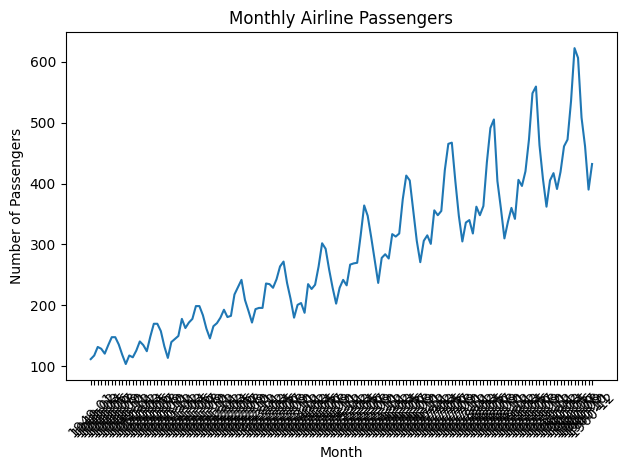

In [22]:
# Plotting the passenger numbers as a simple line chart
plt.plot(df_air["Month"], df_air["Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Monthly Airline Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Bayesian Statistics: Updating Beliefs

Bayesian statistics allow us to update our beliefs as we see new data.

Let us try a toy example using a Beta distribution.


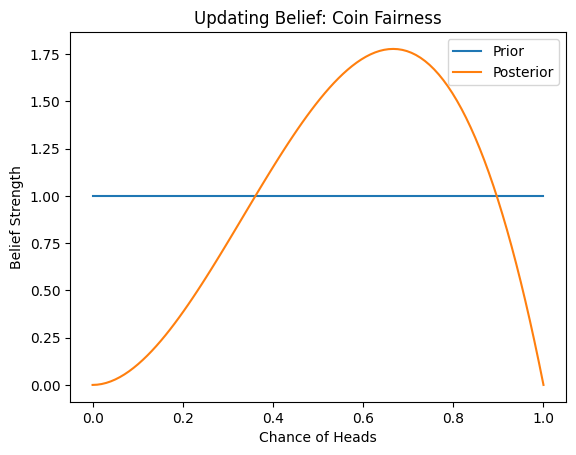

In [23]:
# Updating belief about coin fairness with a Beta distribution
from scipy.stats import beta

prior = beta(a=1, b=1)
posterior = beta(a=3, b=2)  # observed 2 heads, 1 tail
x = np.linspace(0, 1, 100)

plt.plot(x, prior.pdf(x), label="Prior")
plt.plot(x, posterior.pdf(x), label="Posterior")
plt.xlabel("Chance of Heads")
plt.ylabel("Belief Strength")
plt.legend()
plt.title("Updating Belief: Coin Fairness")
plt.show()

# 12. Mini-Project: Simulate and Analyze

You have learned many tools. Let us apply them in a fun two-part project!

First, let us simulate dice rolls and look for patterns.

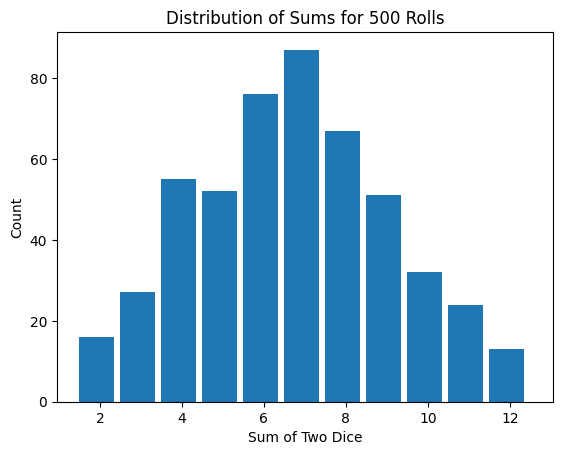

In [24]:
# Mini-project part 1: roll two dice 500 times
rolls1 = np.random.randint(1, 7, 500)
rolls2 = np.random.randint(1, 7, 500)
sums = rolls1 + rolls2

plt.hist(sums, bins=range(2, 14), align='left', width=0.85)
plt.xlabel("Sum of Two Dice")
plt.ylabel("Count")
plt.title("Distribution of Sums for 500 Rolls")
plt.show()

pclass         1         2         3
sex                                 
female  0.964706  0.918919  0.460784
male    0.396040  0.151515  0.150198


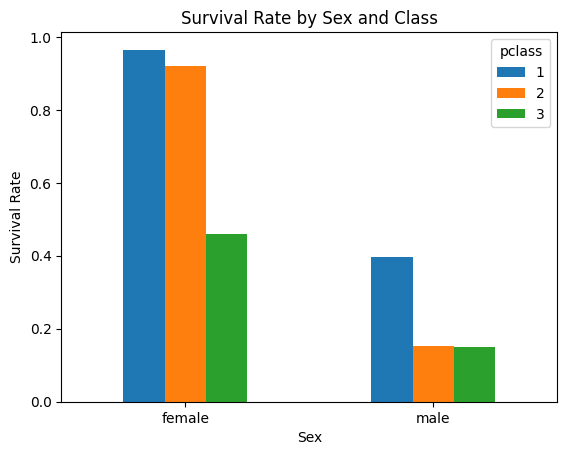

In [25]:
# Mini-project part 2: Analyze Titanic survivors by group
grouped = titanic.groupby(["sex", "pclass"])["survived"].mean().unstack()
print(grouped)
grouped.plot(kind="bar")
plt.title("Survival Rate by Sex and Class")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.show()

# 13. Best Practices & Troubleshooting

- Always check your data for missing or strange values.
- Use plots to spot patterns quickly.
- Rerun cells if something looks odd: sometimes random examples will change.

# 14. Extra Tips

- If you get errors, double-check spelling and capitals.
- More datasets can be found at seaborn-data or UCI Machine Learning Repository.
- Try adding your own comments above code blocks to help you remember what each does.

In [3]:
# Challenge: Enter your favorite number and flip that many coins.
try:
    number = int(input("How many coins would you like to flip? "))
    flips = np.random.choice(["H", "T"], size=number)
    print("Flips:", flips)
    print("Number of heads:", np.sum(flips == "H"))
except:
    print("Please enter a valid number next time!")

Please enter a valid number next time!
